In [1]:
import sys
import os

sys.path.append(os.path.dirname(os.getcwd()))
os.chdir("../")

In [2]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

import numpy as np
import torch

# Try different subsets of Map

In [4]:
def add_geo_features(ax):
    ax.add_feature(cfeature.BORDERS, linestyle=':')
      
    ax.coastlines()
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.LAND, edgecolor='black')
    ax.add_feature(cfeature.LAKES, edgecolor='black', alpha=0.5)
    ax.add_feature(cfeature.RIVERS)
    
def add_cities(ax, cities):
    for city, (lon, lat) in cities.items():
        ax.plot(lon, lat, 'ro', transform=ccrs.PlateCarree())
        ax.text(lon + 0.1, lat + 0.1, city, transform=ccrs.PlateCarree())

def grid_points(ax, grid_xy):
    ax.plot(grid_xy[0], grid_xy[1], 'ro', transform=ccrs.PlateCarree(), markersize=1)

def mesh_points(ax, mesh_pos):
    ax.plot(mesh_pos[0], mesh_pos[1], 'go', transform=ccrs.PlateCarree(), markersize=3)

def m2m_edges(ax, mesh_pos, m2m_edge_set):        
    for edge in m2m_edge_set:
        source = mesh_pos[:, edge[0]]
        target = mesh_pos[:, edge[1]]
        ax.plot(
            [source[0], target[0]],
            [source[1], target[1]], 
            "g-", 
            transform=ccrs.PlateCarree(),
            linewidth=0.5
        )
        
def g2m_edges(ax, grid_xy, mesh_pos, g2m_edge_set): 
    for edge in g2m_edge_set:
        source = grid_xy[:, edge[0]]
        target = mesh_pos[:, edge[1]]
        ax.plot(
            [source[0], target[0]],
            [source[1], target[1]], 
            "b-", 
            transform=ccrs.PlateCarree(),
            linewidth=0.5
        )

def m2g_edges(ax, grid_xy, mesh_pos, m2g_edge_set):        
    for edge in m2g_edge_set:
        source = mesh_pos[:, edge[0]]
        target = grid_xy[:, edge[1]]
        ax.plot(
            [source[0], target[0]],
            [source[1], target[1]], 
            "r-", 
            transform=ccrs.PlateCarree(),
            linewidth=0.5
        )
        
def degrees(edge_index):
    degrees = [0] * (max(edge_index[0]) + 1)
    for i in range(edge_index.shape[1]):
        degrees[edge_index[0, i]] += 1
        
    return max(degrees), min(degrees)

Bounding box:
[-12.5, 42.5, 35, 75]


Text(0.5, 1.0, 'ERA5 UK - GraphCast')

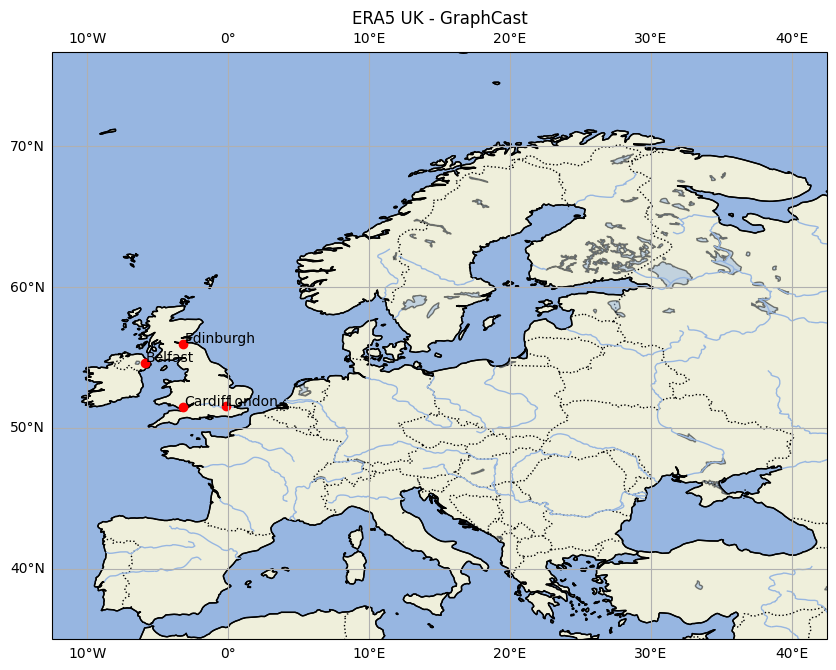

In [5]:
# Create a map with PlateCarree projection
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# Set the extent to focus on the UK

lat_slice=slice(35, 75),
lon_slice=[slice(360 - 12.5, None), slice(0, 42.5)],

uk_extent = [-12.5, 42.5, 35, 75]
ax.set_extent(uk_extent)
print("Bounding box:")
print(uk_extent)

# Add geographical features
add_geo_features(ax)

# Add cities
cities = {
    'London': (-0.1276, 51.5074),
    'Edinburgh': (-3.1883, 55.9533),
    'Cardiff': (-3.1791, 51.4816),
    'Belfast': (-5.9301, 54.5973)
}
add_cities(ax, cities)

# Add gridlines
gl = ax.gridlines(draw_labels=True)
gl.top_lables = False
gl.right_labels = False

plt.title('ERA5 UK - GraphCast')

In [6]:
def dms_to_decimal(degrees, minutes, direction):
    decimal = degrees + minutes / 60
    if direction in ['S', 'W']:
        decimal = -decimal
    return decimal


In [9]:
south_most = [[49, 53, 'N'], [6, 20, "W"]]
west_most = [[54, 28, 'N'], [8, 10, "W"]]
east_most = [[52, 28, "N"], [1, 45, "E"]]
north_most = [[60, 49, "N"], [0, 47, "W"]]

south_most = [dms_to_decimal(*south_most[0]), dms_to_decimal(*south_most[1])]
west_most = [dms_to_decimal(*west_most[0]), dms_to_decimal(*west_most[1])]
east_most = [dms_to_decimal(*east_most[0]), dms_to_decimal(*east_most[1])]
north_most = [dms_to_decimal(*north_most[0]), dms_to_decimal(*north_most[1])]

print("South most:", south_most)
print("West most:", west_most)
print("East most:", east_most)
print("North most:", north_most)

box = [west_most[1], east_most[1], south_most[0], north_most[0]]
box

rounded_box = [-8.00, 1.75, 49.75, 61.00]

South most: [49.88333333333333, -6.333333333333333]
West most: [54.46666666666667, -8.166666666666666]
East most: [52.46666666666667, 1.75]
North most: [60.81666666666667, -0.7833333333333333]
